In [1]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

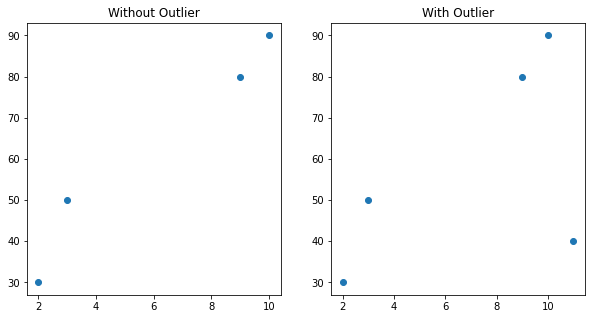

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [3]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [6]:
w1,b1 = OLS(x1,y1)
w1,b1

(6.6, 22.900000000000006)

In [7]:
w2,b2 = OLS(x2,y2)
w2,b2

(3.4285714285714284, 34.0)

In [8]:
x1_pred= x1*w1+b1
x2_pred= x2*w2+b2
x1_pred,x2_pred

(array([88.9, 82.3, 42.7, 36.1]),
 array([68.28571429, 64.85714286, 44.28571429, 40.85714286, 71.71428571]))

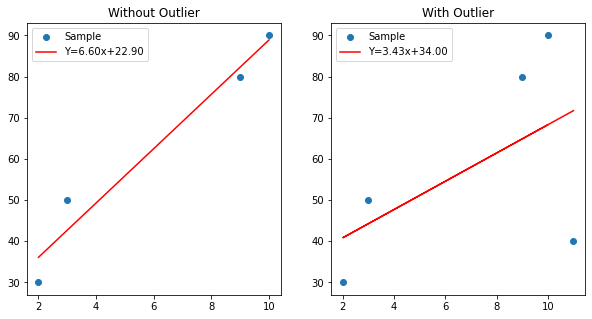

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1,1),y1)
model1.coef_,model1.intercept_

(array([6.6]), 22.899999999999984)

In [27]:
import warnings
warnings.filterwarnings(action='ignore')
# 경고메시지 나타내기
# warnings.filterwarnings(action='default')


from sklearn.datasets import load_boston

boston = load_boston()
# boston -> DataFrame으로 변환보면 익숙함
import pandas as pd
boston_df = pd.DataFrame(
    boston['data'],
    columns=boston['feature_names']
)
boston_df

boston_df['price'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


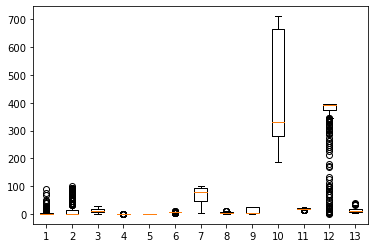

In [52]:
import matplotlib.pyplot as plt
plt.boxplot(boston['data'])
plt.show()

In [60]:
Q1 = boston_df['B'].quantile(0.25)
Q3 = boston_df['B'].quantile(0.75)
IQR = Q3-Q1
MAX = Q3+1.5*IQR
MIN = Q1-1.5*IQR
MIN,MAX

(344.10624999999993, 427.49625000000003)

In [65]:
target= boston_df['B'][
    (boston_df['B']<MIN) | (boston_df['B']>MAX)
]
target.index

Int64Index([ 18,  25,  27,  32,  34, 102, 118, 134, 145, 146, 151, 152, 153,
            154, 155, 156, 160, 165, 167, 168, 169, 170, 286, 366, 367, 384,
            399, 404, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417,
            418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
            431, 432, 433, 434, 435, 436, 437, 438, 444, 445, 446, 449, 450,
            454, 455, 456, 457, 458, 460, 465, 466, 467, 475, 489, 490],
           dtype='int64')

In [67]:
boston_df = boston_df.drop(target.index)

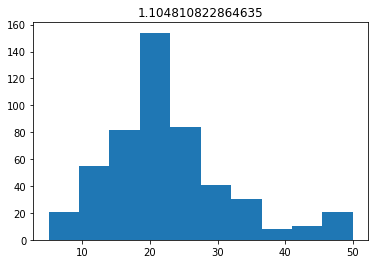

In [74]:
# 로그 변환
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

plt.hist(boston['target'])
plt.title(f'{skew(boston["target"])}')
plt.show()

In [68]:
# 선형회귀 모델링
y = boston_df['price']
X = boston_df.drop(columns='price')
from sklearn.preprocessing import StandardScaler
# 표준화
# scaler = StandardScaler()
# X_sc = scaler.fit_transform(X)
# # 정규화
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X_sc = scaler.fit_transform(X)

In [69]:
# 표준화(추천하지 않음)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train_sc = scaler.fit_transform(x_train) # fit_ -> 표준편차와 x의 평균을 구해주는 과정-> transform 변환 
# x_test_sc = scaler.transform(x_test)

In [70]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100) # 종류가 아닌 수치 이기에 strtify 는 사용 할 수 없음.

In [71]:
# 모델
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
model.score(x_train,y_train),model.score(x_test,y_test)
# (0.7421573768304615, 0.7246154314616738)

(0.7333970447189131, 0.7605037585652703)

## 1.1 경사하강법

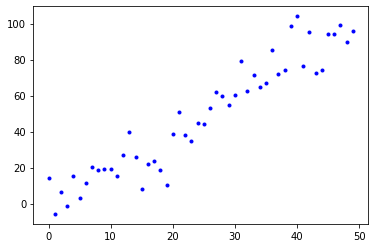

In [75]:
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')

In [76]:
X = X.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,Y)
model.score(X,Y)
model.coef_,model.intercept_

(array([2.08282983]), -2.5593925799839994)

In [78]:
pred = model.predict(X) # 예측값
pred

array([-2.55939258, -0.47656275,  1.60626707,  3.6890969 ,  5.77192673,
        7.85475655,  9.93758638, 12.02041621, 14.10324604, 16.18607586,
       18.26890569, 20.35173552, 22.43456534, 24.51739517, 26.600225  ,
       28.68305482, 30.76588465, 32.84871448, 34.93154431, 37.01437413,
       39.09720396, 41.18003379, 43.26286361, 45.34569344, 47.42852327,
       49.51135309, 51.59418292, 53.67701275, 55.75984258, 57.8426724 ,
       59.92550223, 62.00833206, 64.09116188, 66.17399171, 68.25682154,
       70.33965136, 72.42248119, 74.50531102, 76.58814084, 78.67097067,
       80.7538005 , 82.83663033, 84.91946015, 87.00228998, 89.08511981,
       91.16794963, 93.25077946, 95.33360929, 97.41643911, 99.49926894])

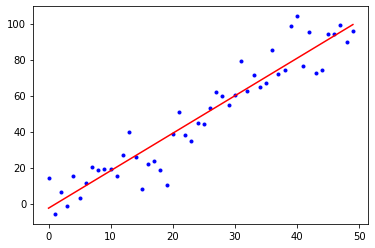

In [80]:
plt.plot(X,Y,'b.')
plt.plot(X,pred,'r-')

## 1.2 다항변환

In [81]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(5).reshape(-1, 1)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [82]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


In [94]:
P = PolynomialFeatures(degree=2, include_bias=False)
x_poly = P.fit_transform(boston_df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
boston_df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((429, 13), (429, 104))

In [95]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9515600110929708, -1.8577085247464904)